In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = pd.read_csv('X.csv', sep = '\t')
X = np.array(X)

FileNotFoundError: File b'X.csv' does not exist

In [8]:
Y = pd.read_csv('Y.csv', sep = '\t', header= None)
Y = np.array(Y)

In [9]:
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
mean_precision = []
vk = []
from sklearn.ensemble import RandomForestClassifier
for k in np.arange(1,100,2):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    vprecision = []
    for train_index, test_index in kf.split(X, Y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        precision = precision_score(y_test, y_pred, average="macro")
        vprecision.append(precision)
    
    print(k)
    vk.append(k)
    mean_precision.append(np.mean(vprecision))
    

plt.plot(vk,mean_precision)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


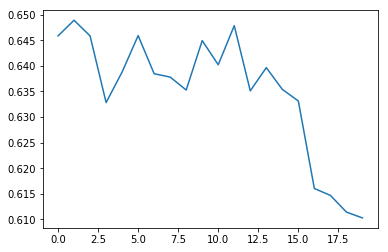

In [14]:
from sklearn.neural_network import MLPClassifier
nneurons = 10
mean_precision = []
Layers = []
vlayers = []
layers = (nneurons,)
slayers = range(20)
for nl in slayers:   
    layers=layers+(nneurons,)
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    vprecision = []
    for train_index, test_index in kf.split(X, Y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=layers, random_state=1)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        precision = precision_score(y_test, y_pred, average="macro")
        vprecision.append(precision)
    print(nl)
    Layers.append(nl)
    mean_precision.append(np.mean(vprecision))
    

plt.plot(slayers,mean_precision)

In [ ]:
plt.plot(slayers,mean_precision)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


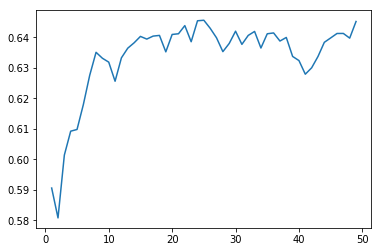

In [12]:
mean_precision = []
vk = []

for k in np.arange(1,50):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    vprecision = []
    for train_index, test_index in kf.split(X, Y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf = RandomForestClassifier(n_estimators=k, random_state = 10, max_depth=10)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        precision = precision_score(y_test, y_pred, average="macro")
        vprecision.append(precision)
    
    print(k)
    vk.append(k)
    mean_precision.append(np.mean(vprecision))
    

plt.plot(vk,mean_precision)